In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import yfinance as yf
import statsmodels.api as sm

In [2]:

tickers = ['AAPL', 'MS', 'MSFT', 'BRK-B', 'GPK', 'TSLA']
weights = [0.1, 0.1, 0.15, 0.45, 0.1, 0.1]

start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

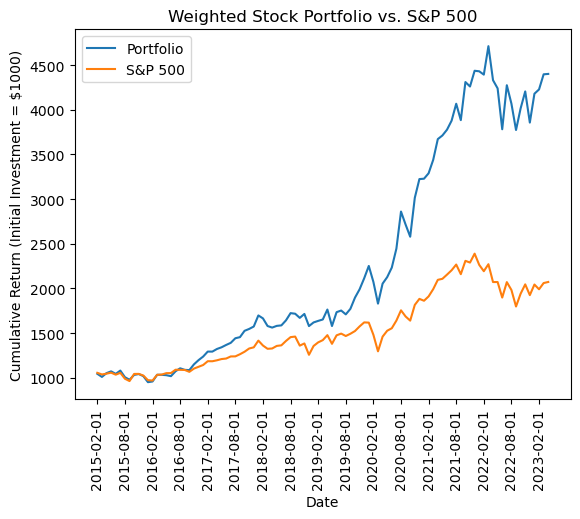

In [3]:
stock_data = pd.DataFrame()
for ticker in tickers:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']
    
stock_returns = stock_data.pct_change().dropna()

portfolio_returns = (stock_returns * weights).sum(axis=1)

sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

plt.plot(portfolio_cumulative_returns, label='Portfolio')
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


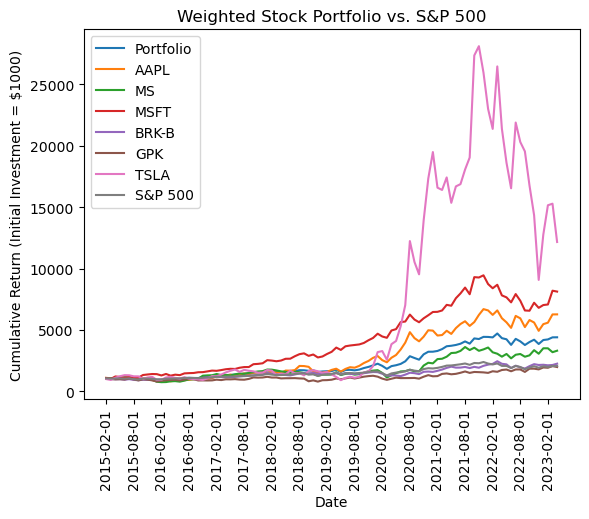

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

stock_data = pd.DataFrame()
for ticker in tickers:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']

stock_returns = stock_data.pct_change().dropna()

portfolio_returns = (stock_returns * weights).sum(axis=1)

sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
stock_cumulative_returns = (1 + stock_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

plt.plot(portfolio_cumulative_returns, label='Portfolio')
for ticker in tickers:
    plt.plot(stock_cumulative_returns[ticker], label=ticker)
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


In [5]:
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
portfolio_returns = data.pct_change().dot(weights).resample('Y').sum()
market_returns = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close'].pct_change().resample('Y').sum()
returns_table = pd.concat([portfolio_returns, market_returns], axis=1)
returns_table.columns = ['Portfolio', 'Market']
print(returns_table)

stock_returns_table = data.pct_change().resample('Y').sum()
stock_returns_table.columns = [ticker + ' Year Returns' for ticker in tickers]
print(stock_returns_table)



[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
            Portfolio    Market
Date                           
2015-12-31  -0.038273  0.005018
2016-12-31   0.215725  0.099646
2017-12-31   0.295464  0.179757
2018-12-31  -0.095969 -0.049921
2019-12-31   0.374691  0.261588
2020-12-31   0.615642  0.210538
2021-12-31   0.374597  0.246839
2022-12-31  -0.124868 -0.187106
2023-12-31   0.139100  0.076492
            AAPL Year Returns  MS Year Returns  MSFT Year Returns  \
Date                                                                
2015-12-31           0.014532        -0.107128          -0.019211   
2016-12-31           0.144815         0.221634           0.026026   
2017-12-31           0.410777         0.201797           0.260999   
2018-12-31          -0.014373         0.055015          -0.312079   
2019-12-31           0.671478         0.115060           0.493420   
2020-12-31           0.7101

In [6]:
combined_returns = pd.concat([portfolio_cumulative_returns, sp500_cumulative_returns], axis=1)
combined_returns.columns = ['Portfolio', 'S&P 500']

portfolio_value = combined_returns['Portfolio'] / combined_returns['Portfolio'][0] * 1000
sp500_value = combined_returns['S&P 500'] / combined_returns['S&P 500'][0] * 1000

investment_values = pd.concat([portfolio_value, sp500_value], axis=1)
investment_values.columns = ['Portfolio', 'S&P 500']

investment_values


,Portfolio,S&P 500
Date,,
2015-02-01,1000.000000,1000.000000
2015-03-01,966.800297,982.603893
2015-04-01,1007.329255,990.976484
2015-05-01,1026.526383,1001.373197
2015-06-01,999.395789,980.332671
...,...,...
2022-12-01,3695.353694,1824.423854
2023-01-01,4004.752261,1937.087241
2023-02-01,4050.719358,1886.505062


In [7]:
difference = returns_table['Portfolio'] - returns_table['Market']

returns_table['Difference'] = difference

returns_table.round(2)


,Portfolio,Market,Difference
Date,,,
2015-12-31,-0.04,0.01,-0.04
2016-12-31,0.22,0.10,0.12
2017-12-31,0.30,0.18,0.12
2018-12-31,-0.10,-0.05,-0.05
2019-12-31,0.37,0.26,0.11
2020-12-31,0.62,0.21,0.41
2021-12-31,0.37,0.25,0.13
2022-12-31,-0.12,-0.19,0.06
2023-12-31,0.14,0.08,0.06


In [8]:
stock_returns_table.round(2)

,AAPL Year Returns,MS Year Returns,MSFT Year Returns,BRK-B Year Returns,GPK Year Returns,TSLA Year Returns
Date,,,,,,
2015-12-31,0.01,-0.11,-0.02,-0.15,0.24,0.17
2016-12-31,0.14,0.22,0.03,0.36,0.17,-0.04
2017-12-31,0.41,0.20,0.26,0.26,0.35,0.44
2018-12-31,-0.01,0.06,-0.31,-0.22,0.23,0.23
2019-12-31,0.67,0.12,0.49,0.31,0.47,0.35
2020-12-31,0.71,0.08,0.12,0.49,0.45,2.54
2021-12-31,0.33,0.27,0.19,0.42,0.44,0.55
2022-12-31,-0.24,0.06,0.19,-0.06,-0.27,-0.83
2023-12-31,0.26,0.05,0.12,0.08,0.19,0.35


In [9]:
average_portfolio_return = returns_table['Portfolio'].mean() * 100
average_market_return = returns_table['Market'].mean() * 100
average_portfolio_return

19.512325883215993

In [10]:
average_market_return

9.365030143730744

In [11]:
average_portfolio_return 
print(f"The average performance of the portfolio is {average_portfolio_return:.2f}% per year.")


The average performance of the portfolio is 19.51% per year.


In [12]:
average_market_return
print(f"The average performance of the market is {average_market_return:.2f}% per year.")


The average performance of the market is 9.37% per year.


In [13]:
betas = {}
for stock in tickers:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    market_data = yf.download('^GSPC', start=start_date, end=end_date)

    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    betas[stock] = results.params['Adj Close']

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

beta_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Beta
AAPL,1.209684
MS,1.334209
MSFT,1.220062
BRK-B,0.884494
GPK,0.826342
TSLA,1.417629


In [14]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)
market_returns = market_data['Adj Close'].pct_change().dropna()

betas = {}
for stock in tickers:
    stock_data = yf.download(stock, start=start_date, end=end_date)

    stock_returns = stock_data['Adj Close'].pct_change().dropna()

    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    betas[stock] = results.params[1]

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

portfolio_beta = (beta_df['Beta'] * weights).sum()

print("Portfolio beta:", portfolio_beta)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Portfolio beta: 1.059818031806639


In [15]:
portfolio_beta

1.059818031806639

In [16]:
risk_adjusted_performance = average_portfolio_return / portfolio_beta 
risk_adjusted_performance

18.411015190932293

In [17]:
market_risk_performance = average_market_return / 1
market_risk_performance

9.365030143730744

In [18]:

stock_data = {}
for stock in tickers:
    stock_data[stock] = yf.download(stock, start=start_date, end=end_date)['Adj Close']

df = pd.concat(stock_data, axis=1)

df.columns = tickers

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MS,MSFT,BRK-B,GPK,TSLA
Date,,,,,,
2015-01-02,24.565699,31.525976,40.709469,149.169998,11.573428,14.620667
2015-01-05,23.873644,30.540527,40.335102,147.000000,11.616043,14.006000
2015-01-06,23.875885,29.660969,39.743095,146.839996,11.684223,14.085333
2015-01-07,24.210684,30.084467,40.248039,148.880005,11.564906,14.063333
2015-01-08,25.140911,30.532383,41.432056,151.369995,11.948414,14.041333
...,...,...,...,...,...,...
2023-04-14,165.210007,86.709999,286.140015,319.739990,24.760000,185.000000
2023-04-17,165.229996,89.290001,288.799988,323.790009,24.910000,187.039993
2023-04-18,166.470001,89.849998,288.369995,324.630005,25.020000,184.309998


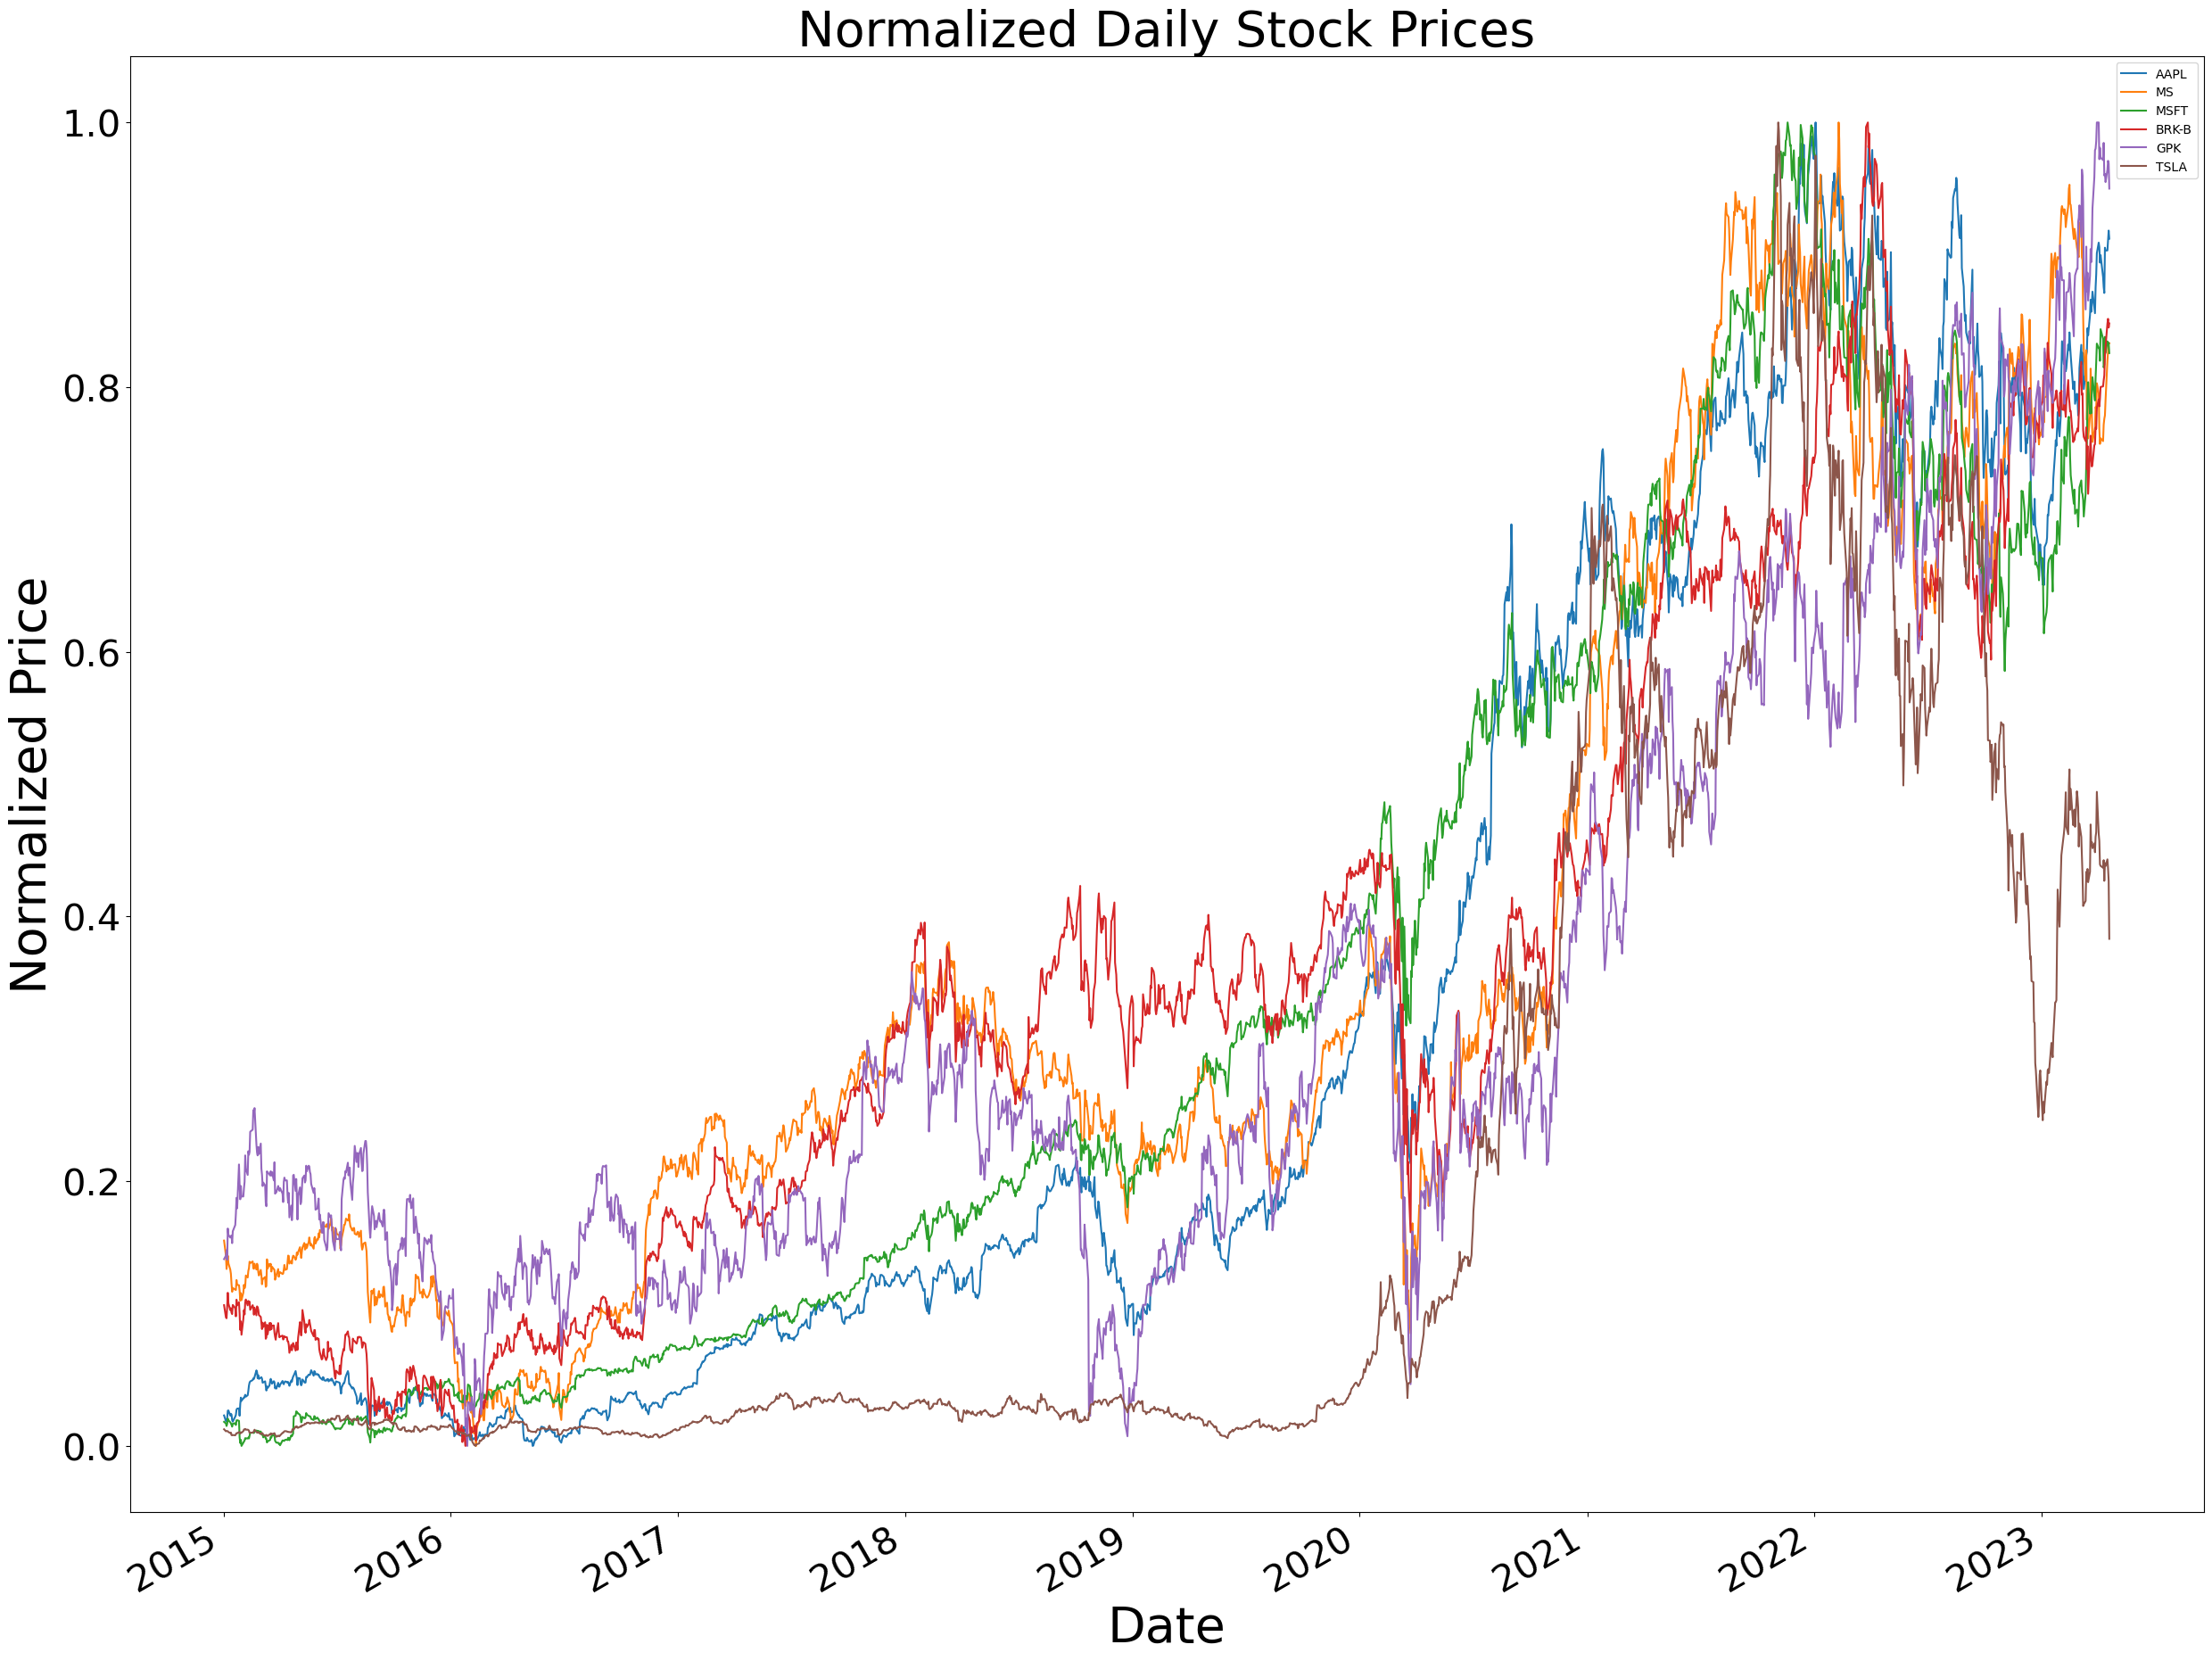

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns, index=df.index)

fig, ax = plt.subplots(figsize = (30, 24))
normalized_df.plot.line(ax=ax, legend=True)
ax.set_title("Normalized Daily Stock Prices")

ax.set_xlabel('Date', fontsize=40)
ax.set_ylabel('Normalized Price', fontsize=40)
ax.set_title('Normalized Daily Stock Prices', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
